In [11]:
# Visulisation details https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
# SSE (Sum of Square Error) = https://www.clusteranalysis4marketing.com/interpretation/sum-of-squared-error-sse/

# Plotting PCA
# plotting PCA (Principal Component Analysis) https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_pca.html
# TSNE - https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
# https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import numpy as np
import ipywidgets as widgets

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [12]:

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        #sse.append(KMeans(n_clusters=k, init='k-means++').fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    plt.show(block=True)

In [18]:
check_clusters = widgets.BoundedIntText(
 value=26,
 min=0,
 max=60,
 description='Maximum Clusters to Check:'
 )
display(check_clusters)

BoundedIntText(value=26, description='Maximum Clusters to Check:', max=60)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


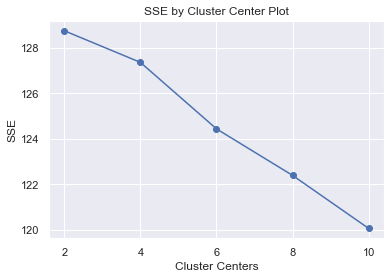

In [21]:

df = pd.read_csv('Data/CrisisLogger/crisislogger.csv')

new_df=df.drop(columns='upload_id').rename(columns={'transcriptions':'DATA_COLUMN'})

document = new_df['DATA_COLUMN'].to_numpy()


vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(document)
max_custers = check_clusters.value
find_optimal_clusters(X, max_custers)

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    plt.show(block=True)


In [ ]:
cluster_count = widgets.BoundedIntText(
 value=26,
 min=0,
 max=60,
 description='Maximum Clusters to Check:'
 )
display(cluster_count)

In [ ]:
    
true_k = 8

clusters = MiniBatchKMeans(n_clusters=true_k, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)

plot_tsne_pca(X, clusters)